# HW5

## Probloem1

In [1]:
import numpy as np 
import mltools as ml
import matplotlib.pyplot as plt
import scipy.linalg

### 1

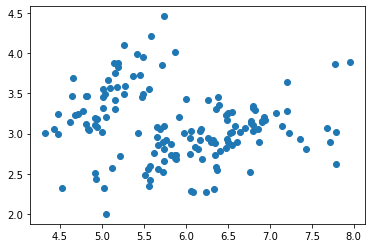

In [2]:
data = np.genfromtxt('data/iris.txt')
data = data[:,:2]
plt.scatter(data[:,0],data[:,1])

I think there are 2 clusters. The data gathers at the up corner is one cluster, and rest of the data are another cluster.

## 2


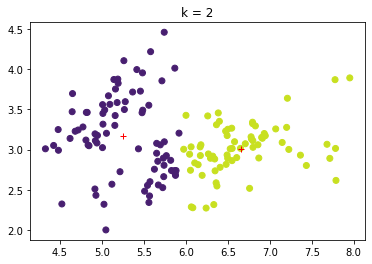

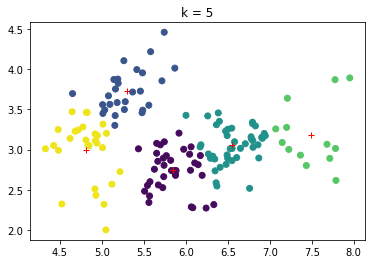

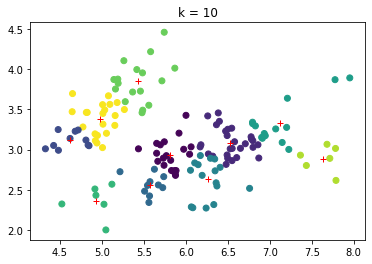

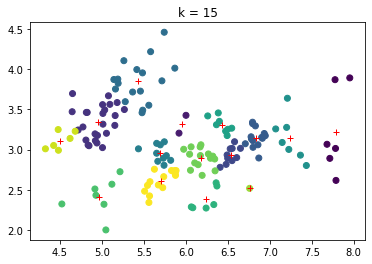

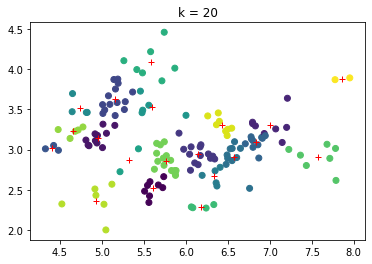

[57.877648396983034, 20.867217448173573, 11.482152994809388, 8.084252130489563, 4.487182947897513]


In [3]:
k_list = [2,5,10,15,20]
score_list = []
for k in k_list:
    z,c,d = ml.cluster.kmeans(data,k)
    ml.plotClassify2D(None,data,z)
    plt.plot(c[:,0],c[:,1],'r+')
    plt.title(f'k = {k}')
    plt.show()
    score_list.append(d)
print(score_list)

### 3

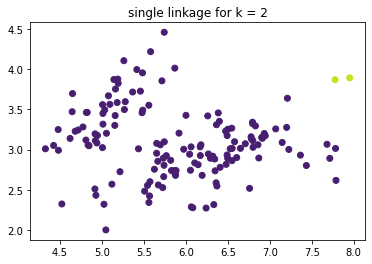

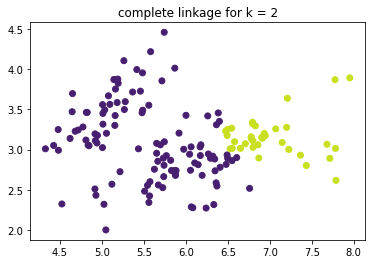

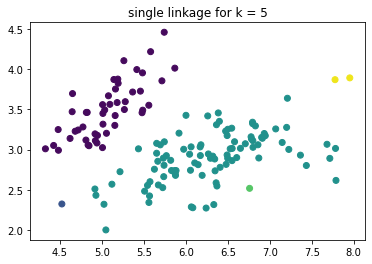

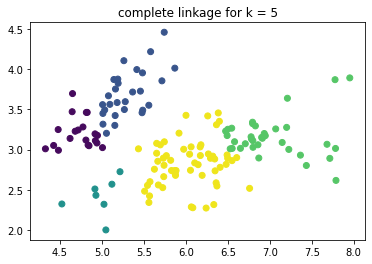

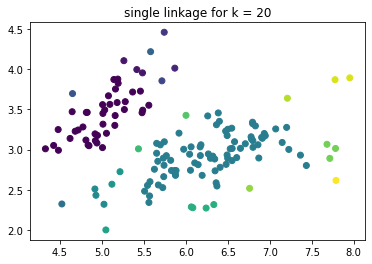

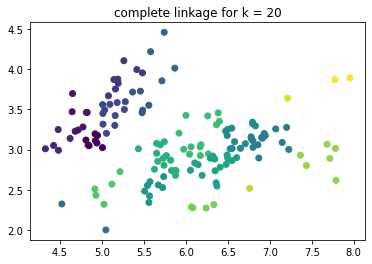

In [4]:
k_list = [2,5,20]
for k in k_list:
    z,j = ml.cluster.agglomerative(data,k,method = 'min')
    ml.plotClassify2D(None,data,z)
    plt.title(f'single linkage for k = {k}')
    plt.show()
    z,j = ml.cluster.agglomerative(data,k,method = 'max')
    ml.plotClassify2D(None,data,z)
    plt.title(f'complete linkage for k = {k}')
    plt.show()

### 4

## Problem 2

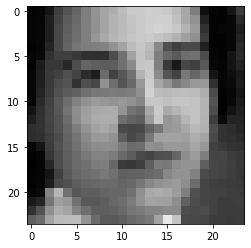

In [5]:
X = np.genfromtxt('data/faces.txt')
plt.figure()
i = 2
img = np.reshape(X[i,:],(24,24))
plt.imshow(img.T,cmap='gray',vmin=0,vmax=255)

### 1

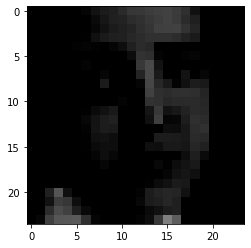

In [6]:
mean = np.mean(X,axis = 0)
img = X[i,:] - mean
img = np.reshape(img,(24,24))
plt.imshow(img.T,cmap='gray',vmin=0,vmax=255)

### 2

In [7]:
mu = np.mean(X,axis = 0,keepdims = True)
X0 = X - mu
U,S,Vh = scipy.linalg.svd(X0,False)
W = U.dot(np.diag(S))
print(W.shape)
print(Vh.shape)

(4916, 576)
(576, 576)


### 3

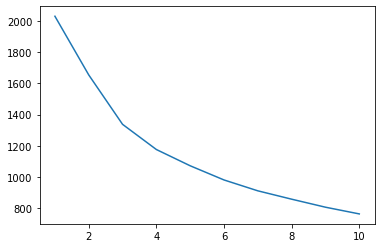

In [8]:
MSE_list = []
for K in range(1,11):
    X0hat = W[:,:K].dot(Vh[:K,:])
    MSE_list.append(np.mean((X0-X0hat)**2))
plt.plot(range(1,11),MSE_list)

### 4

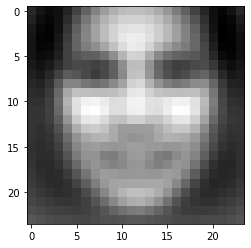

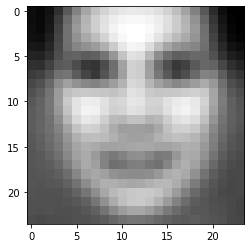

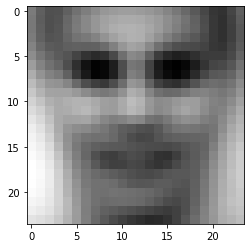

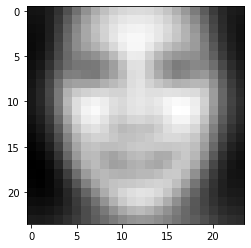

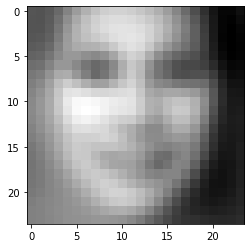

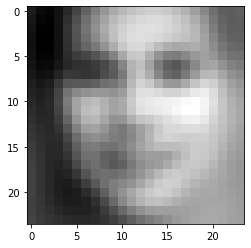

In [16]:
for j in range(3):
    alpha = 2*np.median(np.abs(W[:,j]))
    image_1 = np.reshape(mu+alpha*Vh[j,:],(24,24))
    image_2 = np.reshape(mu-alpha*Vh[j,:],(24,24))
    plt.imshow(image_1.T,cmap = 'gray')
    plt.show()
    plt.imshow(image_2.T,cmap = 'gray')
    plt.show()

### 5

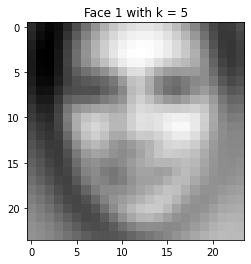

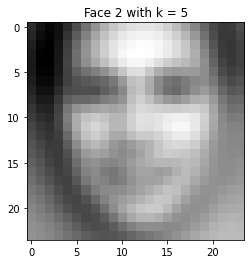

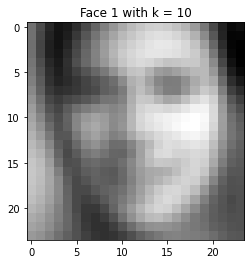

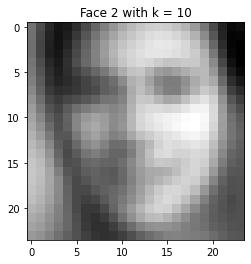

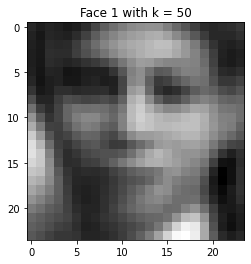

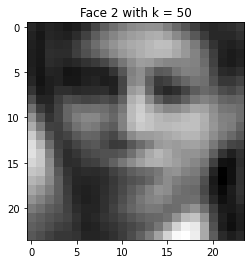

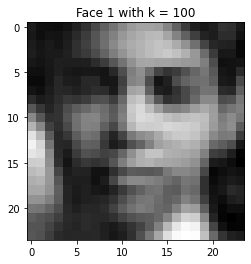

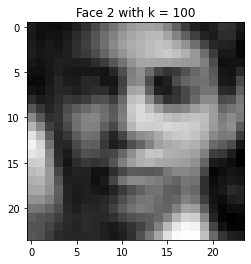

In [30]:
K_list = [5,10,50,100]
for j in K_list:
    image_1 = mu + W[:,0:j].dot(Vh[0:j,:])
    image_1 = np.reshape(image_1[5,:],(24,24))
    plt.imshow(image_1.T,cmap = 'gray')
    plt.title(f'Face 1 with k = {j}')
    plt.show()
    
    image_2 = mu + W[:,0:j].dot(Vh[0:j,:])
    image_2 = np.reshape(image_2[10,:],(24,24))
    plt.imshow(image_1.T,cmap = 'gray')
    plt.title(f'Face 2 with k = {j}')
    plt.show()
    

### 6

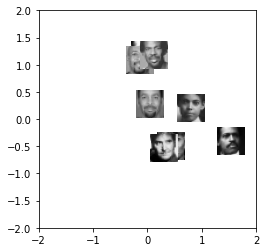

In [34]:
idx = [1,5,6,7,9,13,25,30]

import mltools.transforms
coord,params = ml.transforms.rescale(W[:,0:2])

plt.figure();
for i in idx:
    loc = (coord[i,0],coord[i,0]+0.5,coord[i,1],coord[i,1]+0.5)
    img = np.reshape(X[i,:],(24,24))
    plt.imshow(img.T, cmap = 'gray',extent = loc,vmin = 0 , vmax = 255)
    plt.axis((-2,2,-2,2))